In [53]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import seaborn as sns


In [54]:
df = pd.read_csv('../../data/target_with_label_propagation.csv')
col_test = ['Yield strength (MPa)','Ultimate tensile strength (MPa)', 'Elongation (%)',
            'Reduction of Area (%)','Charpy impact toughness (J)']

In [55]:
df_pca = df.copy()
df_pca.drop(columns='y', inplace=True)
df_pca

,C concentration (weight%),Si concentration (weight%),Mn concentration (weight%),S concentration (weight%),P concentration (weight%),V concentration (weight%),O concentration (ppm/weight),Ti concentration (ppm/weight),N concentration (ppm/weight),Al concentration (ppm/weight),Current (A),Voltage (V),Heat input (kJ/mm),Interpass temperature (deg C),Post weld heat treatment temperature (deg C),Post weld heat treatment time (hours)
0,-1.794624,-0.241903,-1.474090,-0.150353,-0.062002,1.542981e-17,-1.143271e-16,0.000000,0.000000,8.694071e-17,-0.633763,-0.553201,-0.561308,-0.117894,-0.146947,1.374196
1,-1.794624,-0.157085,-0.467487,-0.234530,0.034196,1.542981e-17,-1.143271e-16,0.000000,0.000000,8.694071e-17,-0.633763,-0.553201,-0.561308,-0.117894,-0.146947,1.374196
2,-1.474696,0.182188,0.592095,-0.234530,0.034196,1.542981e-17,-1.143271e-16,0.000000,0.000000,8.694071e-17,-0.633763,-0.553201,-0.561308,-0.117894,-0.146947,1.374196
3,-1.474696,0.182188,0.592095,-0.234530,0.034196,1.542981e-17,-1.143271e-16,0.000000,0.000000,8.694071e-17,-0.633763,-0.553201,-0.561308,-0.117894,1.009610,-0.538309
4,-1.428992,0.012552,1.704655,-0.234530,0.130393,1.542981e-17,-1.143271e-16,0.000000,0.000000,8.694071e-17,-0.633763,-0.553201,-0.561308,-0.117894,-0.146947,1.374196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,-0.286392,2.217828,1.704655,0.270531,0.034196,-1.774348e-01,-2.001648e+00,1.744278,-0.567455,6.872561e-01,2.032492,0.290958,2.272375,-0.117894,-1.023126,-0.857059
1459,0.170648,2.217828,1.678166,0.270531,0.082295,-1.774348e-01,-1.852527e+00,1.744278,-0.651758,9.691357e-01,2.032492,0.290958,2.272375,-0.117894,-1.023126,-0.857059
1460,-0.012168,-1.174905,-0.123123,0.859769,0.322789,-1.572193e-01,1.136661e+00,0.200932,0.212348,-3.697925e-01,1.277891,-0.016009,1.377528,-2.587877,-1.023126,-0.857059
1461,-1.337584,-0.496358,0.300710,-0.234530,-0.062002,1.542981e-17,-1.143271e-16,0.000000,0.000000,8.694071e-17,-0.633763,-0.553201,-0.561308,2.352089,-1.023126,-0.857059


In [56]:
pca = PCA()
pca.fit(df_pca)

PCA()

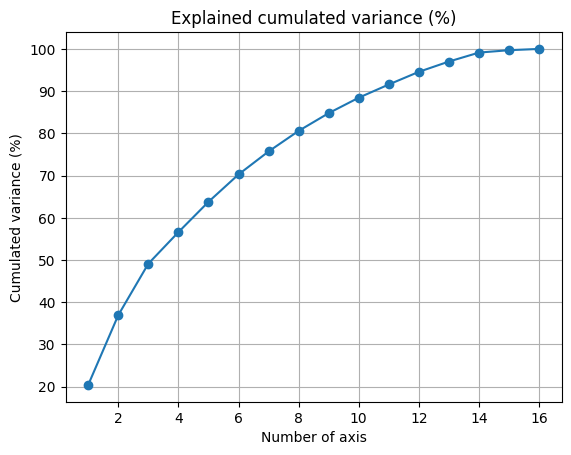

In [57]:
# cumulated variance
cum_var = pca.explained_variance_ratio_.cumsum()

# Cumulated variance plot 
plt.plot(range(1, len(cum_var) + 1), cum_var * 100, marker='o')
plt.xlabel('Number of axis')
plt.ylabel('Cumulated variance (%)')
#plt.title('Graphique de la variance cumulée expliquée selon le nombre de composantes principales')
plt.title('Explained cumulated variance (%)')
plt.grid(True)
plt.show()

In [58]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df_pca)

var_tot = sum(pca.explained_variance_ratio_) * 100
print("Total variance :", var_tot, '%')

Total variance : 88.44282331294289 %


In [59]:
X = pd.DataFrame(X_pca)
y = df['y']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
catboost_classifier = CatBoostClassifier()

cv_scores = cross_val_score(catboost_classifier, X_train, y_train, 
                            cv=kf, scoring='roc_auc', n_jobs=-1)

Learning rate set to 0.00946
0:	learn: 0.6906329	total: 7.58ms	remaining: 7.57s
Learning rate set to 0.009465
1:	learn: 0.6865571	total: 19.6ms	remaining: 9.79s
2:	learn: 0.6828294	total: 30.5ms	remaining: 10.1s
0:	learn: 0.6905497	total: 24.1ms	remaining: 24.1s
3:	learn: 0.6794220	total: 36.6ms	remaining: 9.11s
1:	learn: 0.6857764	total: 33.5ms	remaining: 16.7s
4:	learn: 0.6757561	total: 43.3ms	remaining: 8.62s
2:	learn: 0.6822809	total: 38ms	remaining: 12.6s
5:	learn: 0.6723507	total: 54.1ms	remaining: 8.96s
6:	learn: 0.6693757	total: 63.1ms	remaining: 8.96s
3:	learn: 0.6785734	total: 62ms	remaining: 15.4s
7:	learn: 0.6666984	total: 71ms	remaining: 8.81s
4:	learn: 0.6745138	total: 68.8ms	remaining: 13.7s
8:	learn: 0.6633783	total: 79.1ms	remaining: 8.71s
5:	learn: 0.6699274	total: 72ms	remaining: 11.9s
6:	learn: 0.6668159	total: 75.5ms	remaining: 10.7s
9:	learn: 0.6603571	total: 84.7ms	remaining: 8.39s
7:	learn: 0.6638270	total: 81.1ms	remaining: 10.1s
10:	learn: 0.6581706	total: 91.

In [62]:
cv_scores

array([0.82525752, 0.83054945, 0.84502594, 0.84842921, 0.82252787])

In [63]:
catboost_classifier.fit(X_train, y_train)

Learning rate set to 0.010407
0:	learn: 0.6903691	total: 3.45ms	remaining: 3.44s
1:	learn: 0.6858681	total: 6.64ms	remaining: 3.31s
2:	learn: 0.6815811	total: 9.67ms	remaining: 3.21s
3:	learn: 0.6779253	total: 12.6ms	remaining: 3.13s
4:	learn: 0.6735414	total: 15.4ms	remaining: 3.06s
5:	learn: 0.6696950	total: 18.9ms	remaining: 3.14s
6:	learn: 0.6661407	total: 21.8ms	remaining: 3.09s
7:	learn: 0.6626534	total: 24.3ms	remaining: 3.01s
8:	learn: 0.6586457	total: 27.5ms	remaining: 3.03s
9:	learn: 0.6548635	total: 29.4ms	remaining: 2.91s
10:	learn: 0.6520320	total: 31.7ms	remaining: 2.85s
11:	learn: 0.6482006	total: 33.9ms	remaining: 2.79s
12:	learn: 0.6447850	total: 36.3ms	remaining: 2.76s
13:	learn: 0.6413517	total: 38.6ms	remaining: 2.72s
14:	learn: 0.6382172	total: 41.6ms	remaining: 2.73s
15:	learn: 0.6360849	total: 44.6ms	remaining: 2.74s
16:	learn: 0.6328626	total: 51.7ms	remaining: 2.99s
17:	learn: 0.6295474	total: 56.8ms	remaining: 3.1s
18:	learn: 0.6268448	total: 62ms	remaining: 3

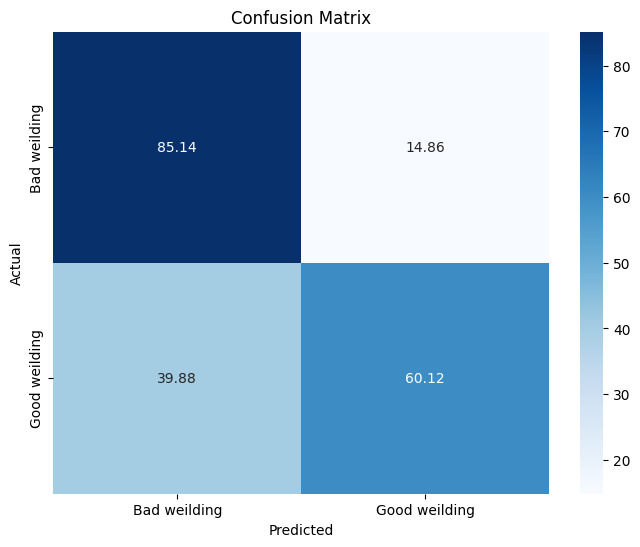

In [69]:
y_pred = catboost_classifier.predict(X_test)
y_pred_prob = catboost_classifier.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm_percentage, index=['Bad weilding', 'Good weilding'], columns=['Bad weilding', 'Good weilding'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues")

# Add labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()